In [10]:
from linescanning import utils, plotting,prf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import numpy as np
import seaborn as sns
opj = os.path.join


In [5]:
SR_ = prf.SizeResponse()
SR_.vf_extent


([-10.124671655397817, 10.124671655397817],
 [-5.7974092428550295, 5.7974092428550295])

['/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/logs/sub-999_ses-2_task-SR_run-demo/sub-999_ses-2_task-SR_run-demo_Screenshots/sub-999_ses-2_task-SR_run-demo_Screenshots1.png', '/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/logs/sub-999_ses-2_task-SR_run-demo/sub-999_ses-2_task-SR_run-demo_Screenshots/sub-999_ses-2_task-SR_run-demo_Screenshots2.png', '/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/logs/sub-999_ses-2_task-SR_run-demo/sub-999_ses-2_task-SR_run-demo_Screenshots/sub-999_ses-2_task-SR_run-demo_Screenshots3.png']
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/logs/sub-999_ses-2_task-SR_run-demo/sub-999_ses-2_task-SR_run-demo_desc-stimuli'


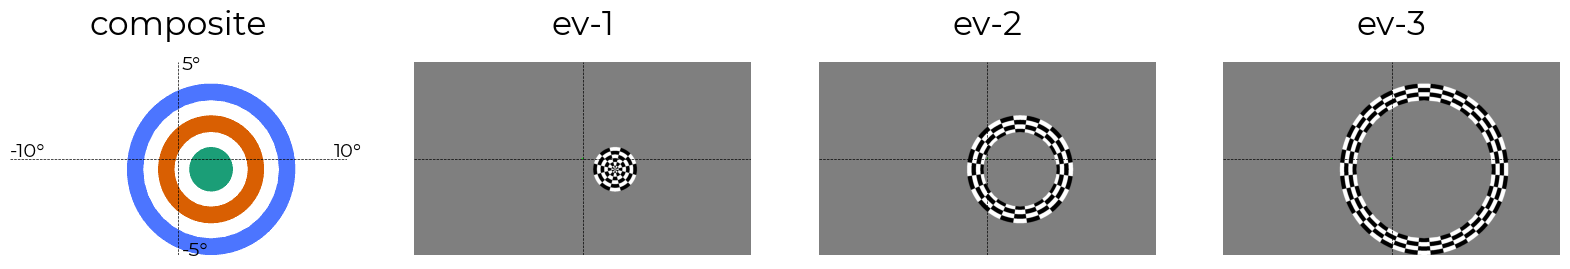

In [13]:
%matplotlib inline
subject = "999"
ses = 2
run = "demo"
task = "SR"

log_dir = "/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/logs"
scr_path = opj(log_dir, f"sub-{subject}_ses-{ses}_task-{task}_run-{run}", f"sub-{subject}_ses-{ses}_task-{task}_run-{run}_Screenshots")
if not os.path.exists(scr_path):
    raise ValueError(f"Could not find directory: '{scr_path}'")
ff = utils.FindFiles(scr_path, extension="png").files

print(ff)

if len(ff)>0:
    imgs = []
    imgs_bin = []
    for file in ff:
        img = (255*mpimg.imread(file)).astype('int')
        img_bin = np.zeros_like(img[...,0])
        img_bin[np.where(((img[..., 0] < 40) & (img[..., 1] < 40)) | ((img[..., 0] > 200) & (img[..., 1] > 200)))] = 1
        imgs.append(img)
        imgs_bin.append(img_bin)

    fig,axs = plt.subplots(ncols=4,figsize=(20,5), sharex=True, sharey=True)
    cols = ["#1B9E77","#D95F02","#4c75ff"]

    ext = []
    for ix,img in enumerate(imgs_bin):
        cm = utils.make_binary_cm(cols[ix])
        axs[0].imshow(img, cmap=cm, extent=SR_.vf_extent[0]+SR_.vf_extent[1])
        plotting.conform_ax_to_obj(ax=axs[0], title="composite")

    for ix,img in enumerate(imgs):
        axs[ix+1].imshow(img, extent=SR_.vf_extent[0]+SR_.vf_extent[1])
        plotting.conform_ax_to_obj(ax=axs[1+ix], title=f"ev-{ix+1}")

    for ix,ax in enumerate(fig.axes):
        ax.axvline(0, color='k', linestyle='dashed', lw=0.5)
        ax.axhline(0, color='k', linestyle='dashed', lw=0.5)
        ax.axis("off")

        if ix == 0:
            for ii,val in zip(
                ["-10°","10°","-5°","5°"], 
                [(0,0.51),(0.96,0.51),(0.51,0),(0.51,0.96)]):

                ax.annotate(
                    ii,
                    val,
                    fontsize=14,
                    xycoords="axes fraction"
                )

    fname = opj(os.path.dirname(scr_path), f"sub-{subject}_ses-{ses}_task-SR_run-{run}_desc-stimuli")
    print(f"Writing '{fname}'")
    for ext in ["svg","png"]:
        fig.savefig(
            f"{fname}.{ext}",
            bbox_inches="tight",
            facecolor="white",
            dpi=300
        )


In [38]:
imgs = []
for file in ff:
    img = (255*mpimg.imread(file)).astype('int')
    img_bin = np.zeros_like(img[...,0])
    img_bin[np.where(((img[..., 0] < 40) & (img[..., 1] < 40)) | ((img[..., 0] > 200) & (img[..., 1] > 200)))] = 1
    imgs.append(img)


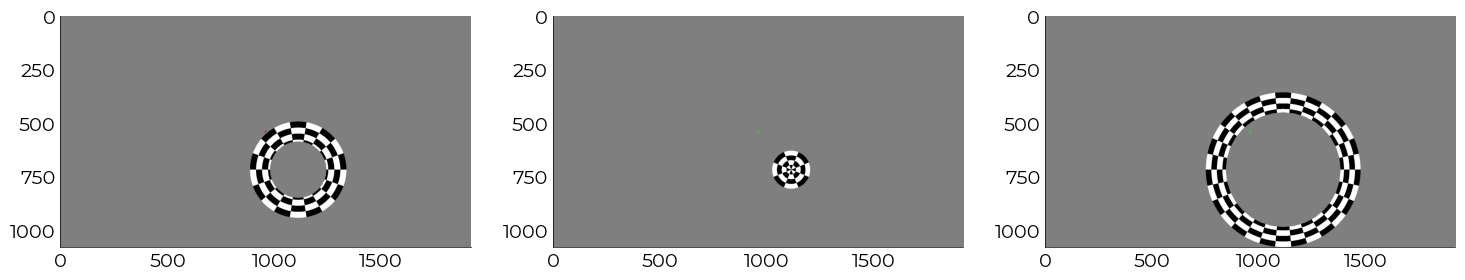

In [39]:
fig,axs = plt.subplots(ncols=len(imgs),figsize=(len(imgs)*6,5))
for ix,img in enumerate(imgs):
    axs[ix].imshow(img)
    plotting.conform_ax_to_obj(ax=axs[ix])


In [14]:
np.arange(0,1,0.1)


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

(<Axes: >, <linescanning.plotting.Defaults at 0x7f6a779184f0>)

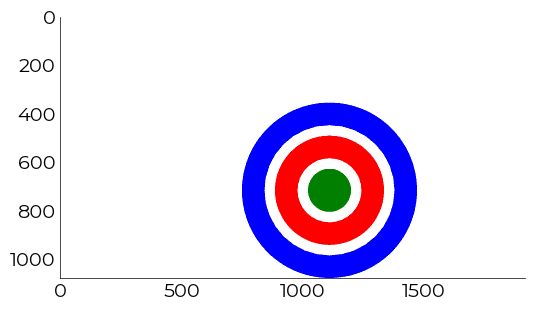

In [36]:
fig,axs = plt.subplots(figsize=(6,5))
cols = ["r","g","b"]
for ix,img in enumerate(imgs):
    cm = utils.make_binary_cm(cols[ix])
    axs.imshow(img, cmap=cm)

plotting.conform_ax_to_obj(ax=axs)
